# Visualize DDoS Attack

In [4]:
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
http_flood_file_relative_path = '../data/Edge-IIoTset dataset/Attack traffic/DDoS_HTTP_Flood_attack.csv'

http_flood_file = os.path.abspath(http_flood_file_relative_path)
# Read the CSV file
http_flood_df = pd.read_csv(http_flood_file)

# Display the data
http_flood_df.head(5)

C:\Users\christoph.landolt\AppData\Local\Temp\ipykernel_24524\2319866451.py:5: DtypeWarning: Columns (3,6,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  http_flood_df = pd.read_csv(http_flood_file)


,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:35:29.350784000,192.168.0.170,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_HTTP
1,2021 11:35:29.366808000,192.168.0.170,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_HTTP
2,2021 11:35:29.383006000,192.168.0.170,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_HTTP
3,2021 11:35:29.399136000,192.168.0.170,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_HTTP
4,2021 11:35:29.418619000,192.168.0.170,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_HTTP


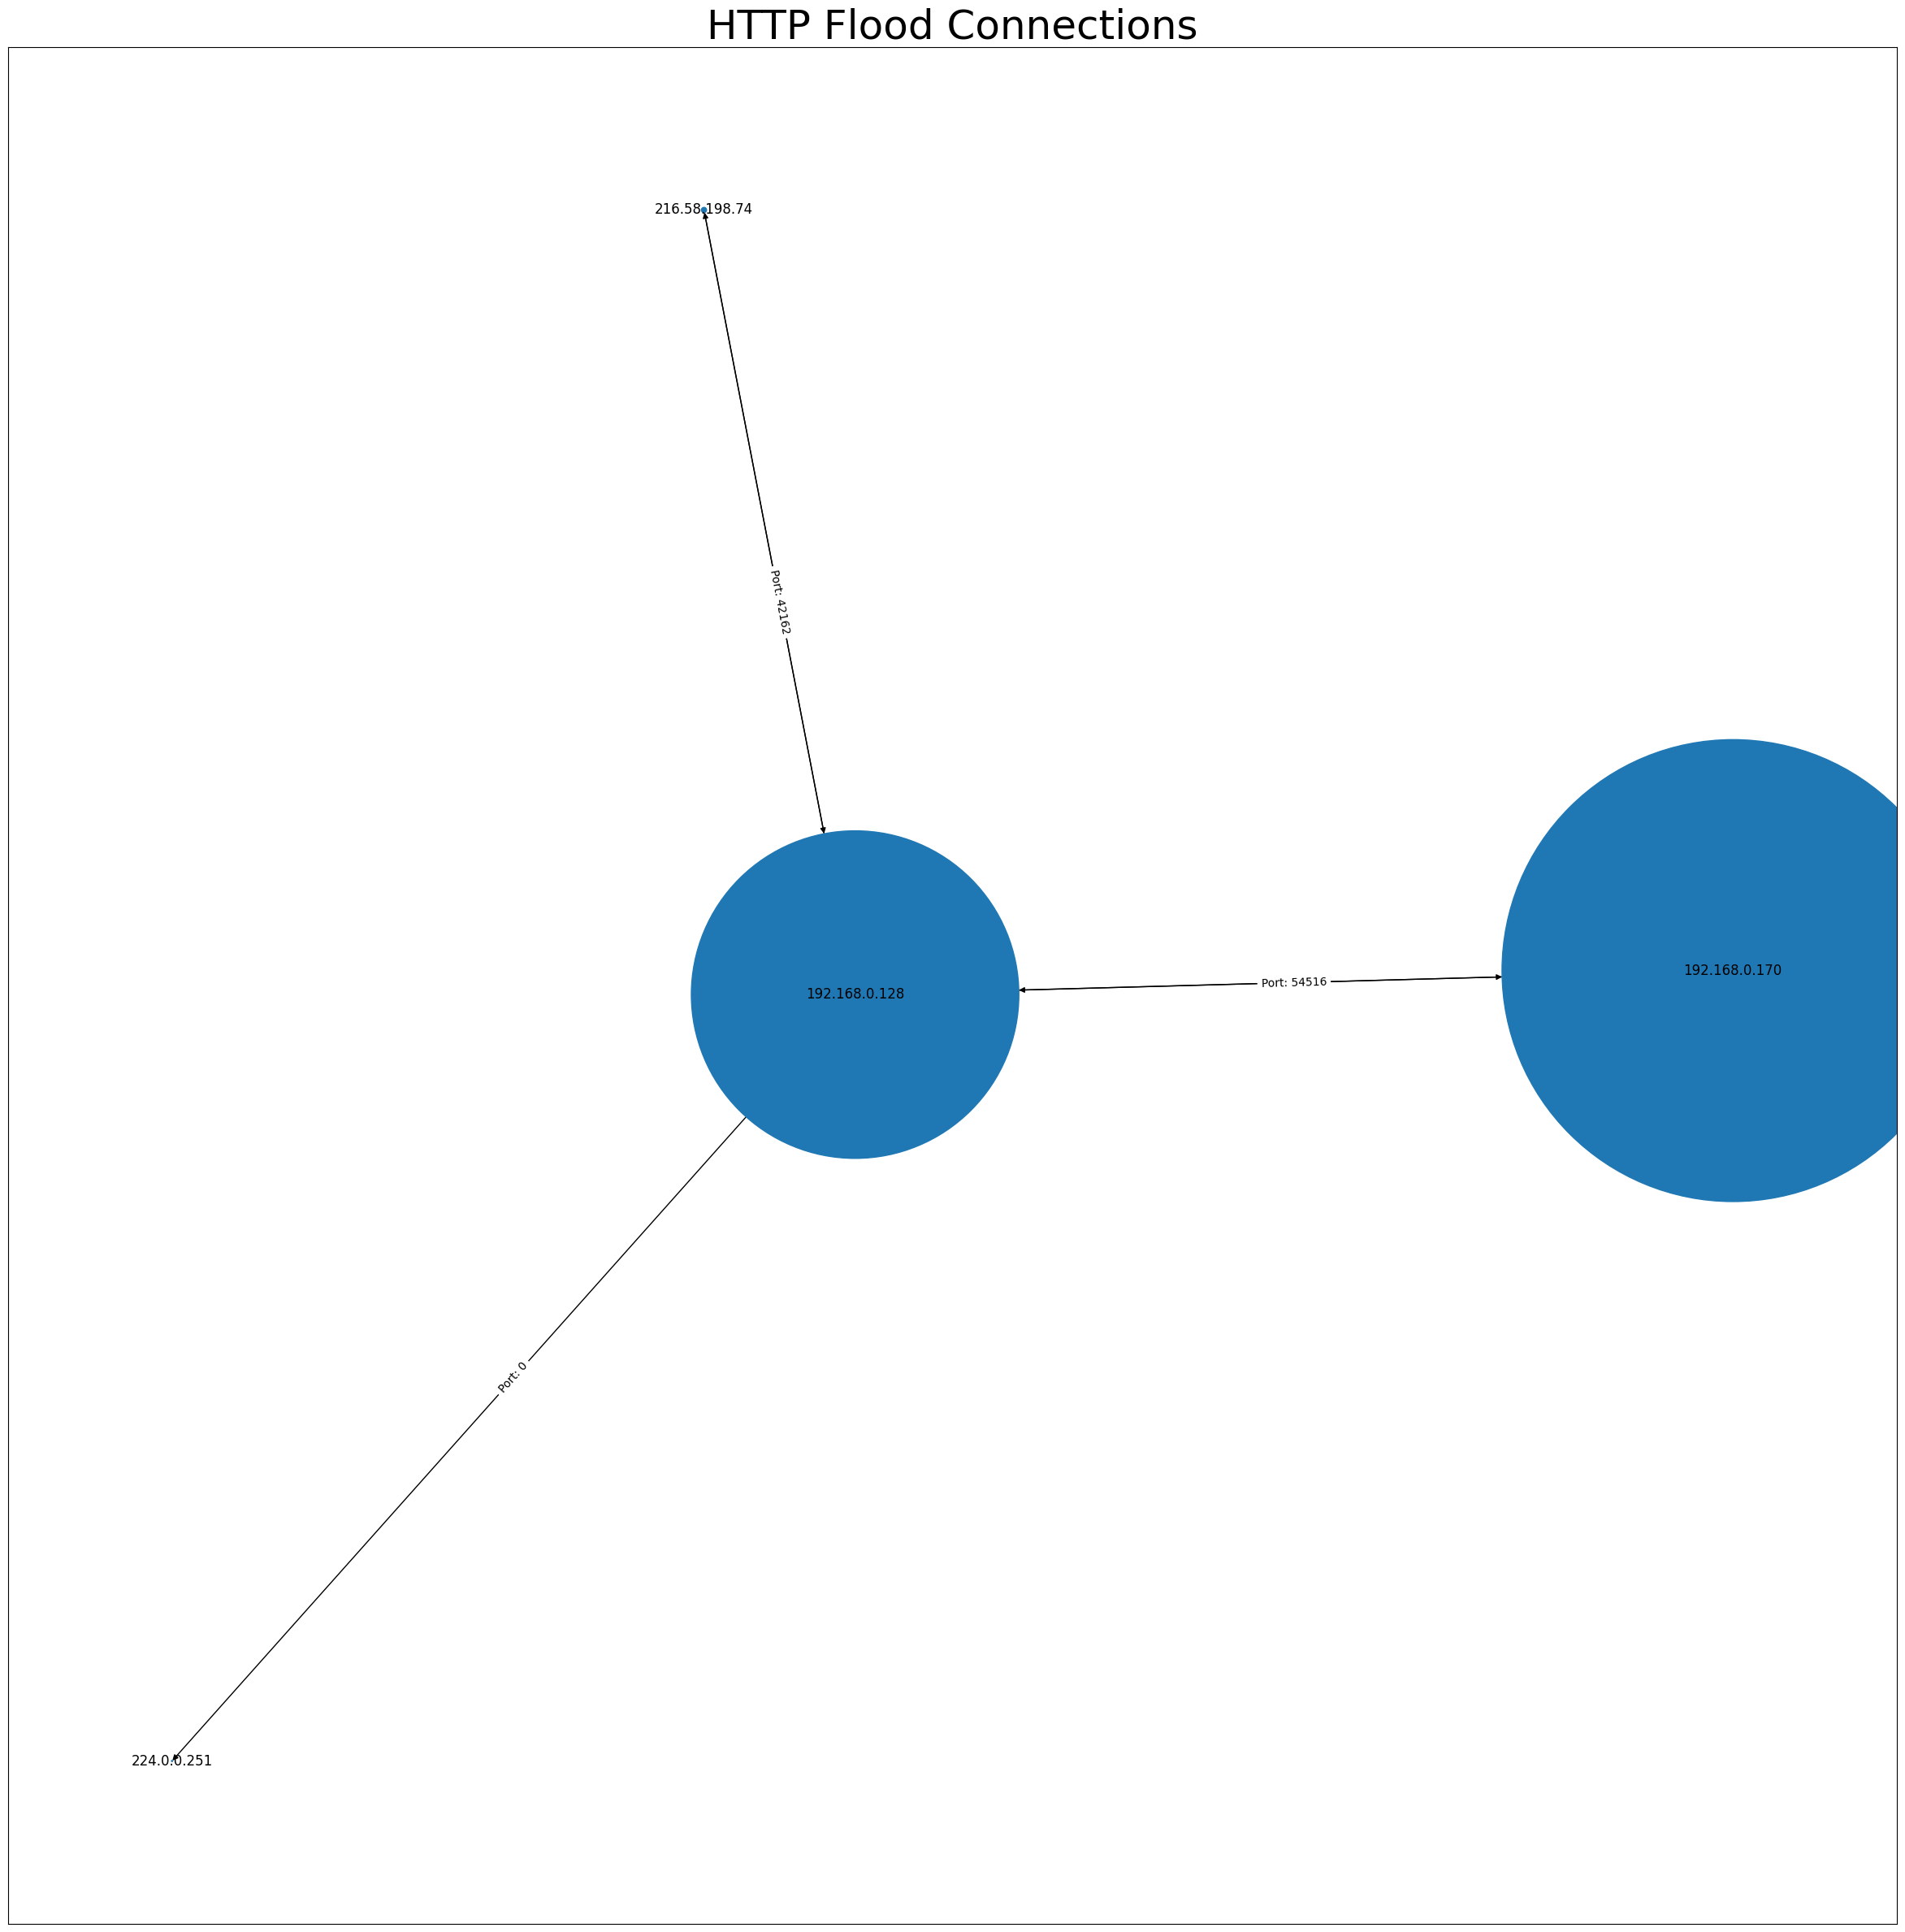

In [21]:
# Create a directed graph
G = nx.DiGraph()

filtered_df = http_flood_df[
    (http_flood_df['ip.src_host'] != '0.0.0.0') &
    (http_flood_df['ip.src_host'] != '0') &
    (http_flood_df['ip.dst_host'] != '224.0.0.1') &
    (http_flood_df['ip.dst_host'] != '0')
]

# Get the count of connections for each source node
node_sizes = http_flood_df['ip.src_host'].value_counts()

# Add edges from 'ip.src_host' to 'ip.dst_host'
for index, row in filtered_df.iterrows():
    src_host = row['ip.src_host']
    dst_host = row['ip.dst_host']
    dst_port = row['tcp.dstport']
    if src_host not in G.nodes():
        G.add_node(src_host, size=node_sizes[src_host])
    if G.has_edge(src_host, dst_host):
        G[src_host][dst_host]['count'] += 1
    else:
        G.add_edge(src_host, dst_host, count=1, dst_port=str('Port: ' + str(int(dst_port))))


# Plot the graph with one-directional edges and tcp.dstport labels
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size=[node_sizes.get(node, 1) * 1.1 for node in G.nodes()], with_labels=True, font_size=12, arrows=True)
edge_labels = nx.get_edge_attributes(G, 'dst_port')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('HTTP Flood Connections', fontsize=36)
plt.show()

## DDoS ICMP Flood attack

In [22]:
icmp_flood_file_relative_path = '../data/Edge-IIoTset dataset/Attack traffic/DDoS_ICMP_Flood_attack.csv'

icmp_flood_file = os.path.abspath(icmp_flood_file_relative_path)
# Read the CSV file
icmp_flood_df = pd.read_csv(icmp_flood_file)

# Display the data
icmp_flood_df.head(5)

C:\Users\christoph.landolt\AppData\Local\Temp\ipykernel_24524\2588717191.py:5: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  icmp_flood_df = pd.read_csv(icmp_flood_file)


,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 23:17:49.149462000,212.62.250.65,192.168.0.128,0,0.0,0.0,0,0x00004af2,1638.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
1,2021 23:17:49.149489000,141.112.76.95,192.168.0.128,0,0.0,0.0,0,0x000049f2,1639.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2,2021 23:17:49.149504000,33.125.100.228,192.168.0.128,0,0.0,0.0,0,0x000048f2,1640.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
3,2021 23:17:49.149519000,231.65.49.18,192.168.0.128,0,0.0,0.0,0,0x000047f2,1641.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
4,2021 23:17:49.149529000,244.122.41.86,192.168.0.128,0,0.0,0.0,0,0x000046f2,1642.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


In [23]:
# Create a directed graph
G = nx.DiGraph()

filtered_df = icmp_flood_df[
    (icmp_flood_df['ip.src_host'] != '0.0.0.0') &
    (icmp_flood_df['ip.src_host'] != '0') &
    (icmp_flood_df['ip.dst_host'] != '224.0.0.1') &
    (icmp_flood_df['ip.dst_host'] != '0')
]

# Get the count of connections for each source node
node_sizes = filtered_df['ip.src_host'].value_counts()

# Add edges from 'ip.src_host' to 'ip.dst_host'
for index, row in filtered_df.iterrows():
    src_host = row['ip.src_host']
    dst_host = row['ip.dst_host']
    dst_port = row['tcp.dstport']
    if src_host not in G.nodes():
        G.add_node(src_host, size=node_sizes[src_host])
    if G.has_edge(src_host, dst_host):
        G[src_host][dst_host]['count'] += 1
    else:
        G.add_edge(src_host, dst_host, count=1, dst_port=str('Port: ' + str(int(dst_port))))


# Plot the graph with one-directional edges and tcp.dstport labels
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size=[node_sizes.get(node, 1) * 1.1 for node in G.nodes()], with_labels=True, font_size=12, arrows=True)
edge_labels = nx.get_edge_attributes(G, 'dst_port')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('HTTP Flood Connections', fontsize=36)
plt.show()

KeyboardInterrupt: 

<Figure size 3000x3000 with 0 Axes>

## DDoS TCP SYN Flood attack

In [ ]:
tcp_syn_flood_file_relative_path = '../data/Edge-IIoTset dataset/Attack traffic/DDoS_TCP_SYN_Flood_attack.csv'

tcp_syn_flood_file = os.path.abspath(tcp_syn_flood_file_relative_path)
# Read the CSV file
tcp_syn_flood_df = pd.read_csv(tcp_syn_flood_file)

# Display the data
tcp_syn_flood_df.head(5)

In [ ]:
# Create a directed graph
G = nx.DiGraph()

filtered_df = tcp_syn_flood_df[
    (icmp_flood_df['ip.src_host'] != '0.0.0.0') &
    (icmp_flood_df['ip.src_host'] != '0') &
    (icmp_flood_df['ip.dst_host'] != '224.0.0.1') &
    (icmp_flood_df['ip.dst_host'] != '0')
]

# Get the count of connections for each source node
node_sizes = filtered_df['ip.src_host'].value_counts()

# Add edges from 'ip.src_host' to 'ip.dst_host'
for index, row in filtered_df.iterrows():
    src_host = row['ip.src_host']
    dst_host = row['ip.dst_host']
    dst_port = row['tcp.dstport']
    if src_host not in G.nodes():
        G.add_node(src_host, size=node_sizes[src_host])
    if G.has_edge(src_host, dst_host):
        G[src_host][dst_host]['count'] += 1
    else:
        G.add_edge(src_host, dst_host, count=1, dst_port=str('Port: ' + str(int(dst_port))))


# Plot the graph with one-directional edges and tcp.dstport labels
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size=[node_sizes.get(node, 1) * 1.1 for node in G.nodes()], with_labels=True, font_size=12, arrows=True)
edge_labels = nx.get_edge_attributes(G, 'dst_port')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('TCP SYN Flood Connections', fontsize=36)
plt.show()

## DDoS UDP Flood Attack

In [ ]:
udp_flood_file_relative_path = '../data/Edge-IIoTset dataset/Attack traffic/DDoS_UDP_Flood_attack.csv'

udp_flood_file = os.path.abspath(udp_flood_file_relative_path)
# Read the CSV file
udp_flood_df = pd.read_csv(udp_flood_file)

# Display the data
udp_flood_df.head(5)

In [ ]:
# Create a directed graph
G = nx.DiGraph()

filtered_df = udp_flood_df[
    (icmp_flood_df['ip.src_host'] != '0.0.0.0') &
    (icmp_flood_df['ip.src_host'] != '0') &
    (icmp_flood_df['ip.dst_host'] != '224.0.0.1') &
    (icmp_flood_df['ip.dst_host'] != '0')
]

# Get the count of connections for each source node
node_sizes = filtered_df['ip.src_host'].value_counts()

# Add edges from 'ip.src_host' to 'ip.dst_host'
for index, row in filtered_df.iterrows():
    src_host = row['ip.src_host']
    dst_host = row['ip.dst_host']
    dst_port = row['tcp.dstport']
    if src_host not in G.nodes():
        G.add_node(src_host, size=node_sizes[src_host])
    if G.has_edge(src_host, dst_host):
        G[src_host][dst_host]['count'] += 1
    else:
        G.add_edge(src_host, dst_host, count=1, dst_port=str('Port: ' + str(int(dst_port))))


# Plot the graph with one-directional edges and tcp.dstport labels
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size=[node_sizes.get(node, 1) * 1.1 for node in G.nodes()], with_labels=True, font_size=12, arrows=True)
edge_labels = nx.get_edge_attributes(G, 'dst_port')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('UDP Flood Connections', fontsize=36)
plt.show()